# WEATHER PREDICTION, CLIMATE CHANGE IMPACT & THE ROLE OF THE HUMANITY ON THE WEATHER

- __Introduction__ :
Global Warming is a fact already proven by different scientist around the world ! The impact of the humanbeing on the climate is a fact !   
The raise of the temperatures are having for source different areas, immensily driven by the human activities on the planet and how the ressources are used and consumed.  
We will try within this app to raise awareness on the human impact on the global warming and try to project the weather situation in the future  
  
  
- __Goal__ :
Within this application, we will try to provide visualization on different features in order to raise awareness of the human impact on the global warming.
The application should contain :
    - A website enabling the user to see the evolution of different features along a yearly axis.
    - The possibility for the user to wheither look at specific country (from a drop-down list) or by default see the global information
    - Provide a projection of the weather according to user input on Year, CO2 Increase, Population difference (mostly increase) and Precipation in Milimeters
    - Provide the user, once input is given, a prediction on the Average, Minimum and Max temperature for the provided year.

<br>

- __Dataset Information__ :  
The Data used for this analysis and prediction are coming from 2 differents sources :  
    - Weather information as well as cities and countries are coming from a dataset available from Kaggle, gathered from a Kaggle User and coming from the [Meteostat.](https://meteostat.net/en/)  
    - CO2 emission as well as the population data are coming from the database of [Our World in Data.](https://ourworldindata.org/)
    - We will limit the investigation and utilization of the data by starting with the year 1970 (decision taken out of the EDA and due to data presence)
<br>


- __Measures__ :
Within the application, I created a machine learning model based on RandomForestRegression to show the temperature evolution.


- __What is happening next__ :    
During the following lines, we will proceed with the following steps :
    1. _EDA_ : Exploratory Data Analyze : Analyze the different dataset and adjust/clean their content in order to answer the goal defined
    2. _Finalize our own dataset_ containing all the required elements to make stuning visualization on the app (this will come)
    3. _Define features_ of interest and create potentially some new features (__feature engineering__)
    4. _Create the machine learning model_ to derive a projection of the temperatures by playing around with the feature we will defined as relevant
    5. _Check on Scores_ out of the adjustment of Hyperparameters
    5. _Identify potential_ for improvement

<br>

__Precaution/advise !!__

The data gathered within this application are having 2 different sources. During the EDA, it has been identified that some of the data might not have been collected with a 100% accuracy.  
The application we are aiming the develop is used as well as a final project within the UDACITY Data Scientist program and aims to show the ability of managing data, helping understand their content but as well tell the story behind the scene.  

Please consider this bias during the lecture and utilization of the visualization.


## Importing the libraries and Analyzing the dataset (EDA)


In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import requests as re
import pyarrow
import json
import datetime as dt
from datetime import datetime
import  matplotlib.pyplot as plt
import seaborn as sb


## Exploratory Data Analyze of the selected Dataset

### Explanation & Loading the datasets

__Dataset details__

- Weather_data contains follwing information :
    - Station_id : The station from which the data were taken
    - data : the date at which the data were collected
    - Season : The season of the year of data collection
    - avg_temp_c : average temperature at the collection date
    - min_temp_c : minimum temperature at the collection date
    - max_temp_c : maximum temperature at the collection date
    - precipitation_mm : the precipitation in mm at the collection date
    - country : the country were the station is located (as ISO Code)
    - name : the name of the station from which the data are collected

Goal of this dataset : collection the weather information on daily basis to use the data for our model. This will as well use to identify the country and create our own dataset for our webapplication.

- countries dataset contains the following information of interest :
    - country : the country name
    - iso2 : the ISO2 code of the country
    - iso3 : the ISO3 code of the country
    - region : region of the country
    - continent : the continent on which the country are located

Goal of this dataset : ensure the accuracy of the station location of the weather dataset. Previously used dataset generated by users showed descrepency. we need to ensure the data accuracy.
This dataset will be as well used to check on the population information and use it potentially for our machine learning model.

Additional column are present within this dataset but will not be used for our webapplication.

- co2_emission dataset contains the following information of interest : 
    - country : the country of the CO2 emission
    - year : the year for which the CO2 emission has been collected
    - iso_code : ISO3 code of the country
    - population : the population of the country at the date of the data collection
    - co2 : the global co2 emission for the year of collection
    - co2_growth_abs : the growth in abs value of the CO2 emission between 2 years
    - co2_growth_prct : the growth in percent of the CO2 emission between 2 years

Goal of this dataset : collect the CO2 emission information to add as feature for our machine learning.
I would like to check on the impact of the CO2 emission on the evolution of the temperature (increase of temperature) and checking for correlations. 

- station_info dataset contains the following information of interest :
    - id : id of the station
    - country : ISO2 code of the station
    - name : name of the station

This dataset will be used to compare the data collected from the weather data and used to ensure the proper station is saved under the proper country.


In [2]:
#weather data containing the weather evolution & data
weather_data = pd.read_parquet('data/daily_weather.parquet', engine='pyarrow')
#loading cities and countries to identify the location of the weather station around the world
countries = pd.read_csv('data/countries.csv')
#loading CO2 and Energy emission around the world per month
co2_emission = pd.read_csv('data/owid-co2-data.csv')
#load json station information
station_info = pd.read_json('data/full.json')
#correct name of station id
station_info['name'] = pd.json_normalize(station_info['name'])['en']
#keep only relevant columns for merging with weather_data
station_info = station_info[['id','country','name']]

In [4]:
weather_data_yearly.columns

Index(['avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm'], dtype='object')

In [5]:
#weather data containing the weather evolution & data
weather_data = pd.read_parquet('data/daily_weather.parquet', engine='pyarrow')
#loading cities and countries to identify the location of the weather station around the world
cities = pd.read_csv('data/cities.csv')
countries = pd.read_csv('data/countries.csv')
#loading CO2 and Energy emission around the world per month
co2_emission = pd.read_csv('data/owid-co2-data.csv')
energy_data = pd.read_csv('data/owid-energy-data.csv')

#load json station information
station_info = pd.read_json('data/full.json')
#correct name of station id
station_info['name'] = pd.json_normalize(station_info['name'])['en']
#keep only relevant columns for merging with weather_data
station_info = station_info[['id','country','name']]

### Exploring & Cleaning Weather Data

In [6]:
weather_data.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
weather_data.shape

(27635763, 14)

In [8]:
weather_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27635763 entries, 0 to 24220
Data columns (total 14 columns):
 #   Column                  Non-Null Count     Dtype         
---  ------                  --------------     -----         
 0   station_id              27635763 non-null  category      
 1   city_name               27621770 non-null  category      
 2   date                    27635763 non-null  datetime64[ns]
 3   season                  27635763 non-null  category      
 4   avg_temp_c              21404856 non-null  float64       
 5   min_temp_c              21917534 non-null  float64       
 6   max_temp_c              22096417 non-null  float64       
 7   precipitation_mm        20993263 non-null  float64       
 8   snow_depth_mm           3427148 non-null   float64       
 9   avg_wind_dir_deg        3452568 non-null   float64       
 10  avg_wind_speed_kmh      5285468 non-null   float64       
 11  peak_wind_gust_kmh      1121486 non-null   float64       
 12  a

From the first visual analyze of the weather data, we can already see that we are having here a lot of information split in 27Millions rows and 14 columns.  
Unfortunately, all the columns are not containing informations, we will here for our model focus on 7 columns I considered important so far :
- station_id & city_name : which will help to locate the areas of interests and potentially later on the countries/continents
- date & season : to group as well per year and see the evolution
- the temperatures indications as well as the level of precipitation

In order to use these data, I would like to make sure each of the columns or at least the one which we will need for our model, are having no null values.  
Additionally, as stated at the beginning of the notebook, we will focus on the evolution of the weather since 1970, meaning all data saved before 1970 will not be used.

Let's now have a look on the other columns to see what kind of information we can get from it.  
I will as well here focus on the columns of interest

In [9]:
#inspection of the columns in term of values/information
weather_data['station_id'].unique()

['41515', '38954', '41560', '38947', '38987', ..., '67475', '68030', '67633', '67775', '67975']
Length: 1227
Categories (1227, object): ['01008', '01026', '01271', '01403', ..., 'D6170', 'D6217', 'EDTR0', 'KPHF0']

In [10]:
weather_data['city_name'].unique()

['Asadabad', 'Fayzabad', 'Jalalabad', 'Kunduz', 'Qala i Naw', ..., 'Kasama', 'Livingstone', 'Mongu', 'Harare', 'Masvingo']
Length: 1235
Categories (1234, object): ['Aalborg', 'Abakan', 'Abha', 'Abidjan', ..., 'Ōita', 'Ōsaka', 'Şanlıurfa', 'Šibenik']

In [11]:
weather_data['season'].unique()

['Summer', 'Autumn', 'Winter', 'Spring']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

In [12]:
weather_data[['avg_temp_c','min_temp_c','max_temp_c','precipitation_mm']].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27635763 entries, 0 to 24220
Data columns (total 4 columns):
 #   Column            Non-Null Count     Dtype  
---  ------            --------------     -----  
 0   avg_temp_c        21404856 non-null  float64
 1   min_temp_c        21917534 non-null  float64
 2   max_temp_c        22096417 non-null  float64
 3   precipitation_mm  20993263 non-null  float64
dtypes: float64(4)
memory usage: 1.0 GB


In [13]:
weather_data['city_name'].isnull().sum()

13993

In [14]:
weather_data[weather_data['city_name'].isnull()]

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,40360,NaN,1985-02-26,Winter,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40360,NaN,1985-02-27,Winter,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40360,NaN,1985-02-28,Winter,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40360,NaN,1985-03-01,Spring,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40360,NaN,1985-03-02,Spring,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13988,40360,NaN,2023-08-24,Summer,32.4,24.0,42.0,0.0,NaN,302.0,20.3,NaN,1009.8,NaN
13989,40360,NaN,2023-08-25,Summer,29.9,22.0,39.0,0.0,NaN,299.0,20.5,NaN,1009.3,NaN
13990,40360,NaN,2023-08-26,Summer,29.9,22.0,39.0,0.0,NaN,298.0,22.0,NaN,1009.1,NaN
13991,40360,NaN,2023-08-27,Summer,28.7,21.7,35.9,0.0,NaN,299.0,25.0,NaN,1007.8,NaN


In [15]:
weather_data['date'].min(), weather_data['date'].max()

(Timestamp('1750-02-01 00:00:00'), Timestamp('2023-09-05 00:00:00'))

What did we learned from the further visual analyze of the date of the weather data ?
- There are 1227 different weather station within the Dataset
- Covering 1235 different cities
- the 4 seasons are always represented, without null values
- We have 1 station id for which we do not have the name of the country
The dates are evolving from 01.02.1750 to 05.09.2023.

What do we do with that ?
- I will first limit the date from 01.01.1970 to 31.12.2022 to have as much information as we can for complete years.

In [16]:
#transform the date to ensure filters and selection are working correctly
weather_data['date'] = pd.to_datetime(weather_data['date'], dayfirst=True)

In [17]:
#limiting the dataframe to the dates of choice
weather_data = weather_data[(weather_data['date']>=pd.to_datetime('01.01.1970', dayfirst=True)) & (weather_data['date']<=pd.to_datetime('31.12.2022', dayfirst=True))]

In [18]:
#Getting only the rows for which the data are present
weather_data = weather_data.dropna(subset=['avg_temp_c','min_temp_c','max_temp_c','precipitation_mm'])

In [19]:
#Limit the dataframe to the desired columns
weather_data = weather_data[['station_id','city_name','date','season','avg_temp_c','min_temp_c','max_temp_c','precipitation_mm']]

### Exploring & Cleaning Cities & Countries

Let's check the first supposition about these 2 Dataframes :
- There should only be unique values according to the station id, meaning 1 station ID should only be present once in the dataframe cities
- There should only be unique values according to the country inside of the countries dataset.

Goal would be to be able to merge the 2 dataframe together to get the information about the continent, region for each station id and later on merge these information with the weather_data Dataframe

In [20]:
cities.head()

,station_id,city_name,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [21]:
countries.head()

,country,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,continent
0,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,Asia
1,Albania,Shqipëria,AL,ALB,2895947.0,28748.0,Tirana,41.326873,19.818791,Southern Europe,Europe
2,Algeria,الجزائر,DZ,DZA,38700000.0,2381741.0,Algiers,36.775361,3.060188,Northern Africa,Africa
3,American Samoa,American Samoa,AS,ASM,55519.0,199.0,Pago Pago,-14.275479,-170.704830,Polynesia,Oceania
4,Angola,Angola,AO,AGO,24383301.0,1246700.0,Luanda,-8.827270,13.243951,Central Africa,Africa


In [22]:
#checking the duplicates for station_id
cities['station_id'].duplicated().sum(), countries['country'].duplicated().sum()

(18, 0)

In [23]:
duplicated_stations = cities[cities['station_id'].duplicated()]['station_id']
cities[cities['station_id'].isin(duplicated_stations)].sort_values(by='station_id')

,station_id,city_name,country,state,iso2,iso3,latitude,longitude
584,06680,Vaduz,Liechtenstein,Unknown,LI,LIE,47.139286,9.522796
985,06680,Appenzell,Switzerland,Appenzell Innerrhoden,CH,CHE,47.333304,9.416701
894,07149,Saint-Denis,Réunion,Unknown,RE,REU,48.935773,2.358023
320,07149,Paris,France,Île-de-France,FR,FRA,48.866693,2.333335
325,07190,Strasbourg,France,Alsace,FR,FRA,48.579966,7.750007
897,07190,Saint-Pierre,Saint Pierre and Miquelon,Unknown,PM,SPM,48.383272,7.471873
536,07280,Saint Helier,Jersey,Unknown,JE,JEY,47.384387,4.683325
311,07280,Dijon,France,Bourgogne,FR,FRA,47.330404,5.030018
1237,41140,Sana'a,Yemen,Unknown,YE,YEM,15.353857,44.205884
905,41140,Jizan,Saudi Arabia,Jizan,SA,SAU,16.906551,42.556565


Out of the first analyze :
- There are 18 duplicated station id within the cities dataframe
- There are no duplicated country within the country dataset.

During the analyze of the cities dataframe, I found out that the data matching between station_id and cities/countries were not correct.  
In order to ensure the data reliability, I directly downloaded from this point the json file of the station_id countries and location from the source used to create the weather_data.  

At this point I took the following assumption :
- The weather data station datapoints are correct
- The countries and cities assigned to these station_id are NOT CORRECT

Using the new json file downloaded from meteostat.net, I decided to proceed as follow :
- Do not take into consideration the cities and countries from the original dataset
- Replace this information from the source meteostat.net

In [24]:
#merging new country and station 
weather_data = weather_data.merge(station_info, right_on='id',left_on='station_id')
#drop the old columns and rename
weather_data = weather_data.drop(columns='city_name').rename(columns={'country_y':'country','name_y':'station_name'})

In [25]:
countries[countries['iso2'].duplicated()]

,country,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,continent
208,Wales,NaN,GB,GBR,NaN,NaN,NaN,NaN,NaN,NaN,Europe


In [26]:
#drop duplicates from countries (GB duplicated)
countries = countries.drop_duplicates(subset='iso2', keep='first')


In [27]:
countries['iso2'].duplicated().sum()

0

We now have a clean countries information which we can use for creating 2 new dataframe.
- One Dataset containing the daily details of the weather information (might be useful depending of which information could be interesting to show on the visualization of the webapplication)
- One Dataset containing the yearly information : a grouped information of the weather/temperature evolution per country and year which will be used for our webapplication

In [28]:
#Creating the daily dataframe
weather_data_daily = weather_data.merge(countries[['iso2','country','region', 'continent']], left_on='country',right_on='iso2', how='left')
#creating columns for Year
weather_data_daily['year'] = weather_data_daily['date'].dt.year
weather_data_daily.head()

,station_id,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,id,country_x,name,iso2,country_y,region,continent,year
0,41515,1974-04-22,Spring,22.0,13.0,28.0,3.0,41515,PK,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1974
1,41515,1974-07-23,Summer,30.5,25.0,38.0,0.0,41515,PK,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1974
2,41515,1976-10-01,Autumn,20.5,16.0,27.0,0.3,41515,PK,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1976
3,41515,1976-10-23,Autumn,20.2,13.0,29.0,0.0,41515,PK,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1976
4,41515,1977-01-07,Winter,6.2,1.0,11.0,0.0,41515,PK,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1977


In [29]:
#rename the column from the merge and clean the structure
weather_data_daily = weather_data_daily.rename(columns={'country_y':'country'}).drop(columns=['country_x','id'])
weather_data_daily.head()

,station_id,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,name,iso2,country,region,continent,year
0,41515,1974-04-22,Spring,22.0,13.0,28.0,3.0,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1974
1,41515,1974-07-23,Summer,30.5,25.0,38.0,0.0,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1974
2,41515,1976-10-01,Autumn,20.5,16.0,27.0,0.3,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1976
3,41515,1976-10-23,Autumn,20.2,13.0,29.0,0.0,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1976
4,41515,1977-01-07,Winter,6.2,1.0,11.0,0.0,Drosh,PK,Pakistan,Southern and Central Asia,Asia,1977


In [30]:
#checking if the applied filter for our data defined above is in place (from 1970 onward)
weather_data['date'].min()

Timestamp('1970-01-01 00:00:00')

In [31]:
#create a dataframe grouping per year and country for future visualization
weather_data_yearly = weather_data_daily.groupby(['year','country','region','continent']).mean().reset_index()


C:\Users\sebdu\AppData\Local\Temp\ipykernel_8776\252709496.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather_data_yearly = weather_data_daily.groupby(['year','country','region','continent']).mean().reset_index()


We now have our 2 dataframe, cleaned and only with the necessary information.

### Cleaning CO2 Emission

As I already decided to start the analyze within the year 1970, we will limit the other dataframe to this period as well.  
Additionally, we will keep only the following columns of interests :
- Country
- Year
- Iso_code
- population
- gdp
- CO2
- CO2 growth_abs
- CO2 growth_prct

All the rest of the columns will not be used right now for our model (limitation of the model for the project).

In [32]:
#limiting all data to only the one starting in 1970
co2_emission = co2_emission[co2_emission['year']>=1970]
co2_emission = co2_emission[['country', 'year', 'iso_code', 'population', 'gdp', 'co2', 'co2_growth_abs', 'co2_growth_prct']]


In [33]:
co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13740 entries, 120 to 48057
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          13740 non-null  object 
 1   year             13740 non-null  int64  
 2   iso_code         11604 non-null  object 
 3   population       12167 non-null  float64
 4   gdp              7930 non-null   float64
 5   co2              12670 non-null  float64
 6   co2_growth_abs   12096 non-null  float64
 7   co2_growth_prct  12069 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 966.1+ KB


Within the CO2 dataframe information, we can see that some data are missing, which could lead to issue within the model.  
We need to discover what exactly is missing and how to deal with these missing values.

In [34]:
#checking on missing iso_code
co2_emission[co2_emission['iso_code'].isnull()]

,country,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct
393,Africa,1970,NaN,3.654504e+08,NaN,302.624,24.708,8.890
394,Africa,1971,NaN,3.750863e+08,NaN,331.861,29.238,9.661
395,Africa,1972,NaN,3.849308e+08,NaN,351.871,20.010,6.030
396,Africa,1973,NaN,3.952124e+08,NaN,378.003,26.132,7.427
397,Africa,1974,NaN,4.060692e+08,NaN,388.390,10.386,2.748
...,...,...,...,...,...,...,...,...
47534,World,2018,NaN,7.683790e+09,1.136302e+14,36766.945,741.491,2.058
47535,World,2019,NaN,7.764951e+09,NaN,37040.102,273.158,0.743
47536,World,2020,NaN,7.840953e+09,NaN,35007.738,-2032.366,-5.487
47537,World,2021,NaN,7.909295e+09,NaN,36816.543,1808.806,5.167


In [35]:
#Checking which are the unique name of the countries for which the iso_code is missing
co2_emission[co2_emission['iso_code'].isnull()]['country'].unique()

array(['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
       'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'French Equatorial Africa (Jones et al. 2023)',
       'French West Africa (Jones et al. 2023)', 'High-income countries',
       'International aviation', 'International shipping',
       'International transport', 'Kosovo', 'Kuwaiti Oil Fires (GCP)',
       'Kuwaiti Oil Fires (Jones et al. 2023)',
       'Least developed countries (Jones et al. 2023)',
       'Leeward Islands (Jones et al. 2023)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle East (GCP)',
       'Non-OECD (GCP)', 'North America', 'North America (GCP)',
       'North America (excl. USA)', 'OECD (GCP)',
       'OECD (Jones et al. 2023)', 'Oceania', 'Oceania (GCP)',
       'Panama Canal Zone (GCP)', 'Panama Canal Zone (Jones et al. 2023)',


The first observation of the dataset shows that iso_code are missing for the regionwise information within the dataframe.  
From the list created above on the unique countries names for which the iso_code is missing, we will simply remove these information.

These information were removed as not as relevant for our model. As well the regional aspect will be aggregated per country and the focus of our visualization will be on global or country level.

In [36]:
#Excluding all the entries for which we don't have the iso_code right now
co2_emission = co2_emission[~co2_emission.isin(co2_emission[co2_emission['iso_code'].isnull()]['country'].unique())]
#deleting the NA rows for which no country information can be found
co2_emission = co2_emission.dropna(subset='country')

In [37]:
#Analyzing the GDP information
co2_emission[co2_emission['gdp'].isnull()]

,country,year,iso_code,population,gdp,co2,co2_growth_abs,co2_growth_prct
169,Afghanistan,2019,AFG,37769496.0,NaN,11.082,0.264,2.436
170,Afghanistan,2020,AFG,38972236.0,NaN,11.888,0.806,7.277
171,Afghanistan,2021,AFG,40099460.0,NaN,12.283,0.395,3.323
172,Afghanistan,2022,AFG,41128772.0,NaN,12.148,-0.135,-1.101
788,Albania,2019,ALB,2873883.0,NaN,4.827,-0.068,-1.389
...,...,...,...,...,...,...,...,...
47884,Zambia,2022,ZMB,20017670.0,NaN,8.922,0.259,2.987
48054,Zimbabwe,2019,ZWE,15354606.0,NaN,9.775,-0.939,-8.765
48055,Zimbabwe,2020,ZWE,15669663.0,NaN,7.850,-1.926,-19.700
48056,Zimbabwe,2021,ZWE,15993525.0,NaN,8.396,0.547,6.962


In [38]:
#Checking for how many countries the GDP information is missing
co2_emission[co2_emission['gdp'].isnull()]['country'].unique(), len(co2_emission[co2_emission['gdp'].isnull()]['country'].unique())

(array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
        'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
        'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
        'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
        'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
        'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
        'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
        'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
        'Cuba', 'Curacao', 'Cyprus', 'Czechia',
        'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', '

As the GDP information seems to be missing for a lot of different countries (total 220). we will not take this column in consideration for our model.

In [39]:
#drop the GDP column
co2_emission = co2_emission.drop(columns='gdp')
co2_emission.head()

,country,year,iso_code,population,co2,co2_growth_abs,co2_growth_prct
120,Afghanistan,1970,AFG,10752973.0,1.670,0.729,77.469
121,Afghanistan,1971,AFG,11015853.0,1.894,0.223,13.360
122,Afghanistan,1972,AFG,11286753.0,1.530,-0.363,-19.181
123,Afghanistan,1973,AFG,11575308.0,1.635,0.105,6.868
124,Afghanistan,1974,AFG,11869881.0,1.913,0.278,16.980


In [40]:
co2_emission.shape

(11604, 7)

Let's now merge the CO2 dataframe with the weather per year dataframe.

In [41]:
weather_data_yearly

,year,country,region,continent,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm
0,1970,Australia,Australia and New Zealand,Oceania,12.101096,6.976164,18.489863,2.133699
1,1970,Azerbaijan,Middle East,Asia,14.511167,9.663167,20.370167,1.156500
2,1970,Belarus,Eastern Europe,Europe,6.382989,2.384215,10.526437,1.838391
3,1970,Bermuda,North America,North America,23.166120,21.018033,25.169399,4.192896
4,1970,China,Eastern Asia,Asia,12.743940,8.209559,18.284296,2.484718
...,...,...,...,...,...,...,...,...
7012,2022,Vanuatu,Melanesia,Oceania,25.846556,21.958678,30.007438,13.672176
7013,2022,Venezuela,South America,South America,26.167965,21.056628,31.390145,4.046483
7014,2022,Vietnam,Southeast Asia,Asia,25.197319,22.258307,28.903589,5.910534
7015,2022,Zambia,Eastern Africa,Europe,21.465427,16.272452,27.569284,2.999725


In [42]:
#merging the yearly data and CO2 Dataframe
weather_data_yearly = weather_data_yearly.merge(co2_emission, how='left', on=['year','country']).sort_values(by=['country','year'])

In [43]:
#Checking of null information / na within our dataframe
weather_data_yearly['year'].isna().sum()

0

## New features of interest ?

We get from the available dataset already a lot of interesting information like min, avg and max temperatures as well as population information per year.
In order to get more details and check on potential impact for a potential machine learning model, I decided to created 4 additional features to check on correlation.
- Difference between 2 years of the max temperature
- Difference between 2 years of the min temperature
- Difference between 2 years of the avg temperature
- Difference between 2 years of the population per country

Let's create these new features.

In [44]:
#Creating additional feature, calculating the difference between 2 consecutive years of the temperatures
weather_data_yearly['max_temp_diff'] = weather_data_yearly.groupby('country')['max_temp_c'].diff()
weather_data_yearly['min_temp_diff'] = weather_data_yearly.groupby('country')['min_temp_c'].diff()
weather_data_yearly['avg_temp_diff'] = weather_data_yearly.groupby('country')['avg_temp_c'].diff()
weather_data_yearly['population_diff'] = weather_data_yearly.groupby('country')['population'].diff()


For the newly created feature, we need to make sure that no Null value are present to ensure a regression model can be used.

In [45]:
#Checking the presence of na values within the new features.
sum(weather_data_yearly['max_temp_diff'].isna()), sum(weather_data_yearly['min_temp_diff'].isna()), sum(weather_data_yearly['avg_temp_diff'].isna()), sum(weather_data_yearly['population_diff'].isna())

(162, 162, 162, 558)

So the new feature are containing na values which will not be good for our regression model. We need to ensure that whether data are present, or remove the null values.  
For our model I will replace these information with 0.

In [46]:
#replacing the NA value by 0
weather_data_yearly['max_temp_diff'].fillna(0, inplace=True)
weather_data_yearly['min_temp_diff'].fillna(0, inplace=True)
weather_data_yearly['avg_temp_diff'].fillna(0, inplace=True)
weather_data_yearly['population_diff'].fillna(0, inplace=True)

weather_data_yearly[['max_temp_diff','min_temp_diff','avg_temp_diff','population_diff']].fillna(0, inplace=True)

C:\Users\sebdu\AppData\Local\Temp\ipykernel_8776\454742954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data_yearly[['max_temp_diff','min_temp_diff','avg_temp_diff','population_diff']].fillna(0, inplace=True)


# Machine Learning Pipeline definition

We now have different features which could have an impact one on the other.  
The goal of our machine learning will be to identity which feature might have an higher impact on our model by finding the correlations between them.

Let's check on the correlations.

C:\Users\sebdu\AppData\Local\Temp\ipykernel_8776\2584674208.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = weather_data_yearly.corr(method='pearson')


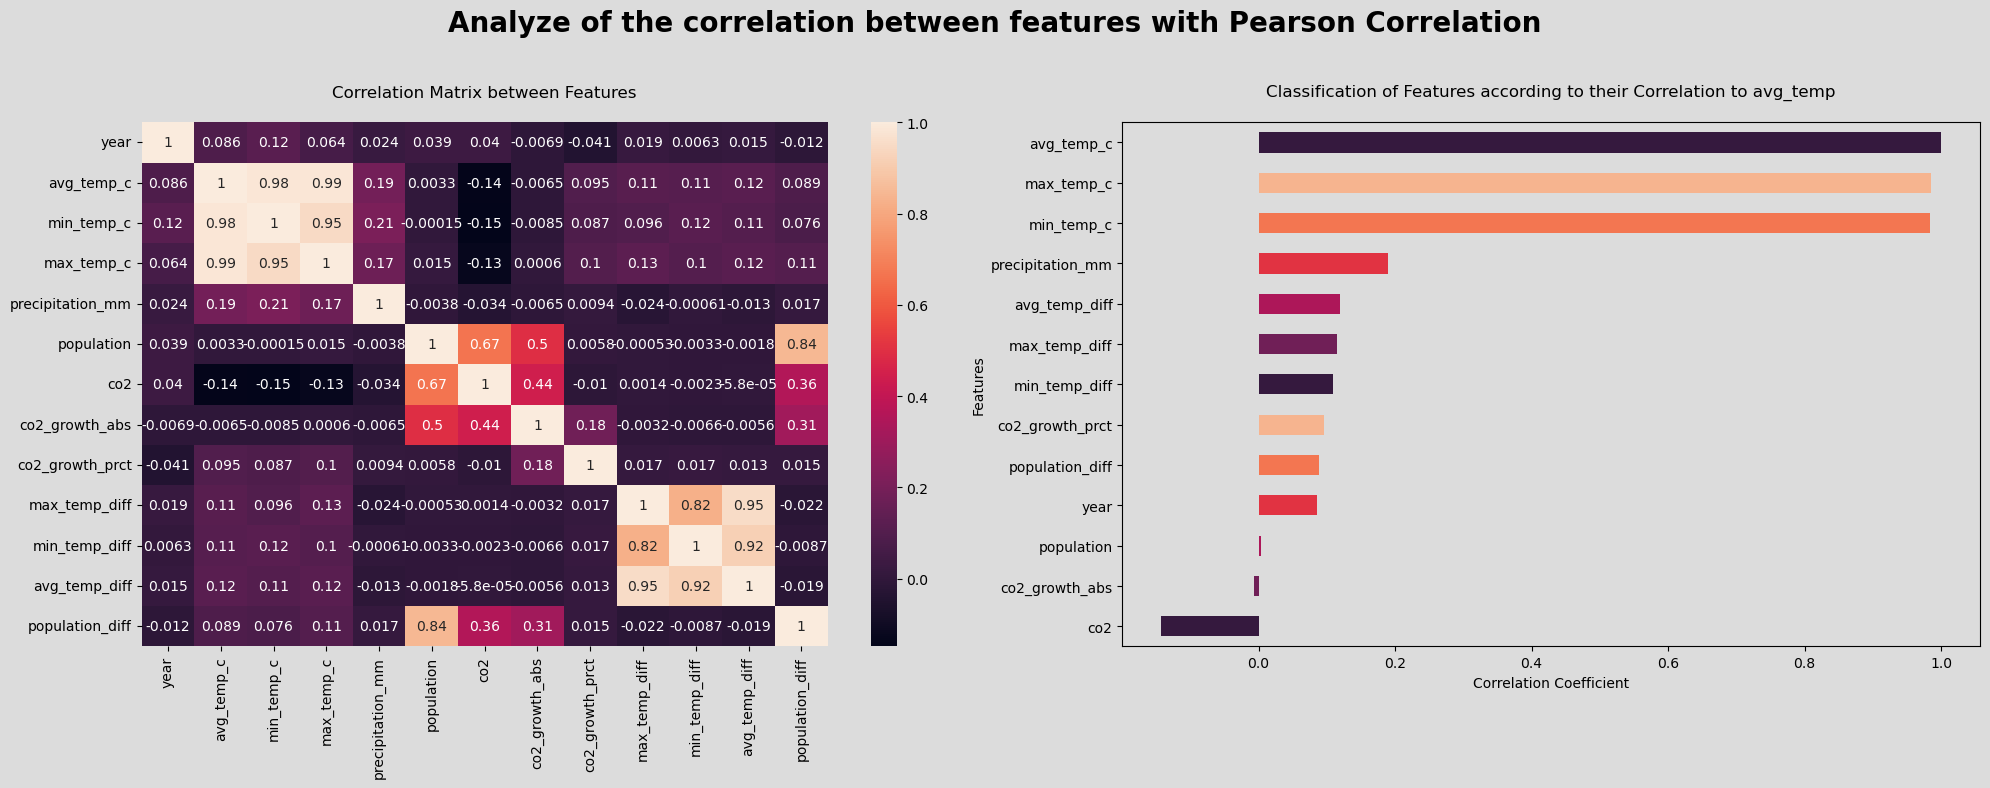

In [47]:
#Calculating the correlation between the different feature
corrmat = weather_data_yearly.corr(method='pearson')
#Creating a list of these different feature available
top_corr_features = corrmat.index
#Define the size of our plot area and some coloring stuff
plt.figure(figsize=(20,8), facecolor='gainsboro')

#Plot 1 : The correlation Matrix
plt.subplot(1,2,1)
sb.heatmap(corrmat, annot=True)
plt.title('Correlation Matrix between Features\n')
ax = plt.gca()

#Plot 2 : The order per correlation score from Top to Bottom
plt.subplot(1,2,2)

corrmat['avg_temp_c'].sort_values(ascending=True).plot.barh(color= sb.color_palette('rocket')).set_facecolor('gainsboro')

plt.title('Classification of Features according to their Correlation to avg_temp\n')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.suptitle('Analyze of the correlation between features with Pearson Correlation\n', weight='bold', size=20 )
plt.tight_layout();



By analyzing the correlation, we can see as expected, that the correlation between the different temperature information are important. We should maybe not consider this information.
We see nevertheless a correlation, not that important, between the population difference (population_diff) and the CO2_growth (prct) within the visualization.

Interestingly, the precipitation is playing a role as well. Which I didn't see coming and should have maybe consider within the webapplication...
We see nevertheless the strong correlation between the CO2 Emission and the population difference. So... the more people are on the planet, the higher are the emission, this was not really a surpise.

By building a simple model for our Webapplication, we have chosen the following features for our machine learning model to evaluate : 
- Year
- Precipitation in mm
- Population & population difference
- CO2 emission & CO2 Growth

The model of choice will be a RandomForestRegressor.

## Application of the RandomForestRegressor model for our Machine Learning model



Let's have a look at how good our machine learning model, without any additional feature or parameters is performing with the selected features.

In [48]:
max_year = weather_data_yearly[weather_data_yearly['year'] == weather_data_yearly['year'].max()]['year'].unique()[0]
sum_co2 = int(weather_data_yearly[weather_data_yearly['year']==max_year]['co2'].sum())
sum_population = int(weather_data_yearly[weather_data_yearly['year']==max_year]['population_diff'].mean())


In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#Droping null value to enable the regression model to apply
weather_data_yearly.dropna(inplace=True)

#Selection of the feature of preference
x= weather_data_yearly[['year','co2','population_diff','co2_growth_prct','precipitation_mm','population']]
#Determining the value to predict later on
y= weather_data_yearly[['avg_temp_c','max_temp_c','min_temp_c']]
#create the train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

Let's have a look on the basic score of our features.

In [69]:
clf= RandomForestRegressor(random_state=42).fit(X_train, y_train)
basic_score = clf.score(X_test, y_test)

The model defined performed pretty well with a score around 83.48%.  
With this score, let's try to identify some parameters which could help to improve the model.  

Let's first identify the parameters available within the selected model.

In [51]:
#get list of available parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

The best way to identity the parameters which will better impact our accuracy is to use GridSearchCV with a set of parameters to look through.  

We will for this use a pipeline which will go through the parameters to identify the best set of parameters to use.  
- Within our model we defined different features (in total 6), we will then play around the number of feature (max_features) to consider within our model to reach the best parameters.  
- As well as we are using e RandomForest model we will check as basis the number of estimators, meaning the number of trees to consider within the forest. 

In [70]:
#Creating our data pipeline
pipeline = Pipeline([('clf', RandomForestRegressor(random_state=42))
                 ])
#Setting the parameters to look upon 
parameters = {
    'clf__max_features':[1,2,3,4,5,6,7],
    'clf__n_estimators':[1,50,100,200,250,300],
}

In [53]:
#creating our model
model = GridSearchCV(pipeline, parameters)
#Fitting the model
model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('clf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'clf__max_features': [1, 2, 3, 4, 5, 6, 7],
                         'clf__n_estimators': [1, 50, 100, 200, 250, 300]})

Let's now check the score of our model with hyperparameters implemented

In [71]:
#score evaluation
improved_model_score = model.score(X_test, y_test)

And check which are the best parameters

In [55]:
model.best_params_

{'clf__max_features': 5, 'clf__n_estimators': 300}

With the defined parameters, the model selected with hyperparameters is performing a little better than the first one, increason the score from 83.48% to almost 84%.

In [56]:
weather_data_yearly[['year','co2','population_diff','co2_growth_prct','precipitation_mm','population']]

,year,co2,population_diff,co2_growth_prct,precipitation_mm,population
78,1973,5.286,0.0,-6.236,0.166667,2520442.0
193,1974,4.342,65015.0,-17.874,0.000000,2585457.0
404,1976,4.947,128107.0,7.755,0.000000,2713564.0
514,1977,5.717,61234.0,15.567,0.000000,2774798.0
750,1979,7.584,113966.0,16.834,4.684831,2888764.0
...,...,...,...,...,...,...
6242,2017,9.296,298396.0,-11.751,8.063415,14751101.0
6395,2018,10.715,301090.0,15.265,3.367308,15052191.0
6548,2019,9.775,302415.0,-8.765,3.315625,15354606.0
6697,2020,7.850,315057.0,-19.700,1.000000,15669663.0


In [136]:
model.predict([[2023,sum_co2*0.5,sum_population*0.3,-2,10,(sum_population+(sum_population*0.6))]])

d:\Anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[20.95280719, 25.10438667, 17.37345583]])

## Evaluating the impact of features reduction on the model performance

Within my first attempt, I had selected to use only 3 features for predicting the temperatures evolutions.  
By curiosity, I wanted to check on the impact of additional features, correlated at the end, but which at first didn't seem to me of interest.  

My first choice was to use only the following parameters :
- CO2 Emission
- Population difference
- Year

Let's have a look at the score evolution between the model with only 3 features and the one with the 6 features (knowing that 5 features are matching the best parameters with GridSearchCV)


In [134]:
#Selection of the first feature of preference
x_basic= weather_data_yearly[['year','co2','population_diff']]
#Determining the value to predict later on
y_basic= weather_data_yearly[['avg_temp_c','max_temp_c','min_temp_c']]
#create the train and test dataframes
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(x_basic, y_basic, random_state=42, test_size=0.3)

clf= RandomForestRegressor(random_state=42).fit(X_train_basic, y_train_basic)
first_basic_score = clf.score(X_test_basic, y_test_basic)

In [135]:
first_basic_score

0.7039914409583882

Let's plot the 3 different scores obtained during the utilization of the model.

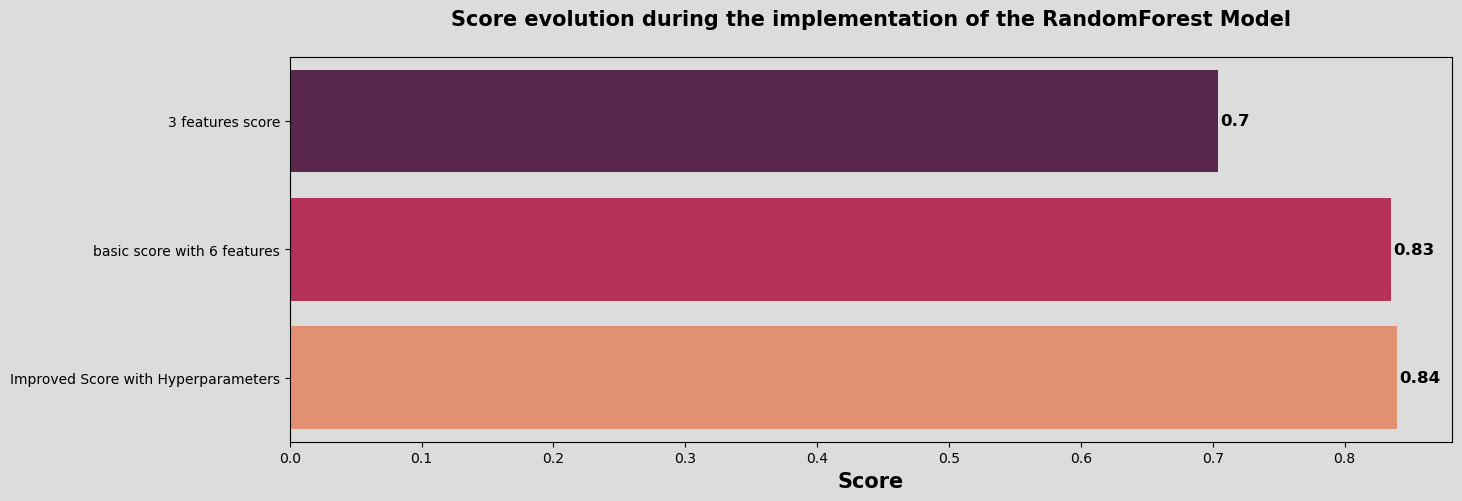

In [132]:
%matplotlib inline
plt.figure(figsize=(15,5), facecolor='gainsboro')

#create a list of values containing our scores
score = [first_basic_score, basic_score, improved_model_score]
#plot the bars of the scores
sb.barplot(x=score,y=['3 features score','basic score with 6 features','Improved Score with Hyperparameters'], palette='rocket').set_facecolor('gainsboro')

#improve visualization title and content
plt.ylabel('')
plt.xlabel('Score', weight='bold', size=15)
plt.title('Score evolution during the implementation of the RandomForest Model\n', weight='bold', size=15)

#ploting value labels for each bar
for i in range(0,3):
    count = score[0:3][i]
    count_string = i
    plt.text(count+0.002, count_string, f'{count:.2}', va='center', size=12, weight='bold');

The utilization of the GridSearchCV and the hyperparameters, as well as the extension of our model to consider additional feature led to an improvement of our Machine Learning model.  

We went from a basic model with 3 features resulting of a score about 0.7 to a model with 6 features (5 considered by the best parameters) with a score about 0.84.

## Potential improvement of our Machine Learning model

Within the creation of my model and the webapplication, I thought about extending the model to country or continent/region specifics.  
Indeed, the temperatures, evolution of population as well as CO2 emission are differing from one area to the other, due to the fact of policy and law application tending toward more protection of the environment.  

Applying or extending the machine learning by considering the country specific information could have potentially improve our model but certainly as well the user experience.  
In order to tackle this area, I would have potentially used dummy features based on the country to clearly identify which data is about which country or continent. 

Additionally, but not knowing the complete depth of this technic, I could have give tensor flow a try to this machine learning model.  
Apparently, this is providing pretty good results.

- Additional limitation : a lot of countries are not having enough information or data within the dataset available. getting more information/data for these specific countries, could have lead to an improvement of the model.  

Thinking about the consideration of the null values within the dataset, I could have taken another approach by trying to put some average temperatures or precipitation for the selected year.  
This would maybe be an improvement.

In order to get a more perfect result; I could have as well limited the data to only the main countries and regions where we are sure of having datas. Like Europe, US, China. The big continent could have lead to a more accurate information.  

This is only the beginning of the journey, it could be interesting as well to directly fetch the data from the meteostat API in order to continuously get the information and improve step by step the model.

### SPECIAL ACKNOWLEDGMENT 



A special thanks to OurWorldinData as well as to Meteostat for the data provided enabling to create the model but as well the visualization.  
Thanks as well to Udacity for providing me, during the course, the necessary basis for creating my own webapplication and how to re-use what I learned during the Course !